<a href="https://colab.research.google.com/github/ISX901006/dsm/blob/main/DFB_001%EF%BC%9AData_Loading_%26_Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DFB_001：Data Loading & Data Cleaning

作者：Isaac, Cherrie

關鍵詞：data source, data format, missing value, outlier

日期：2025/11/04

參考用書：Python for Data Analysis, by Wes McKinney

---



# 1. 資料載入與儲存

在確認完專案的需求，下一個就是要取得分析所要運用的資料啦
接下來我們會主要用 Pandas 這個套件來進行輸入和輸出資料的動作。

## 1.1 複習 Pandas 與 Pandas 基礎資料結構

Pandas 聽了很多次，這個套件主要是做什麼的呢？

Pandas，Python界的Excel，它可以結合 NumPy 的功能，以及試算表和關連式資料庫的資料操作能力，我們可以用來對資料進行重構、切割、聚合及選擇子集等操作，算是進行數據分析最主要也常用的套件之一。

> NumPy 主要用於數值計算，提供 N 維陣列（ndarray）這個物件進行大規模的多維陣列與矩陣運算。它包含大量的數學函數，並為科學計算、資料分析和機器學習等領域都好運用這個套見作為基礎

#### 延伸討論：[RDBMS vs. NOSQL | 關聯式資料庫 vs. 非關聯式資料庫](https://medium.com/@eric248655665/rdbms-vs-nosql-%E9%97%9C%E8%81%AF%E5%BC%8F%E8%B3%87%E6%96%99%E5%BA%AB-vs-%E9%9D%9E%E9%97%9C%E8%81%AF%E5%BC%8F%E8%B3%87%E6%96%99%E5%BA%AB-1423c9fbb91a)

[參考資料](https://medium.com/seaniap/pandas%E5%9F%BA%E7%A4%8E%E4%BB%8B%E7%B4%B9-%E9%80%B2%E5%85%A5%E8%B3%87%E6%96%99%E7%A7%91%E5%AD%B8%E7%9A%84%E9%A0%98%E5%9F%9F-be9894b3548)

[參考資料](https://numpy.org/)

### 1.1.1 Series
Series 是一個一維(1D)的同質性資料結構，類似於陣列（array），但額外包含「索引（Index）」的功能，可用來標示每個元素。

以常見的表格來說就是一個 DataFrame 中的「欄位」(columns)。

> 同質性就是你在同一個籃子裡，不能同時放水果跟零食，你必須要放香蕉、蘋果、芭樂。同樣的變成數據的話，就必須都是字串、整數或是浮點數...

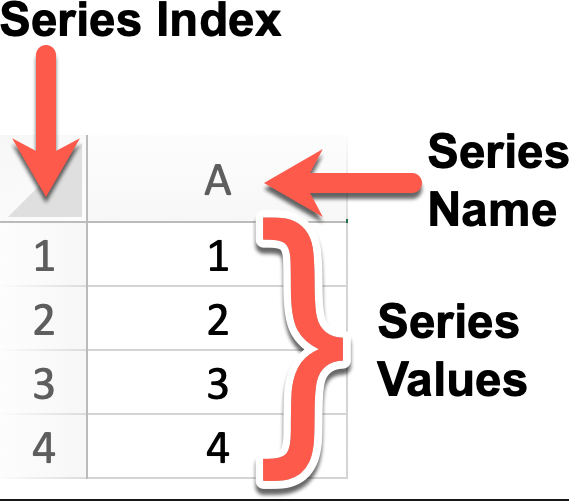




### 1.1.2 Index

Index 是用來標示資料列的標籤，可以是數字、字串、時間等型別。Pandas 的所有資料結構都會依賴 Index 來做資料對齊。

> 你可以把 Index 想像成資料的「地址標籤」或「特定編號」。就像一棟大樓的每一戶人家都有門牌號碼（Index），這些門牌號碼不一定連號、也不一定是數字，但可以幫助你快速找到對應資料在哪裡。

#### 為什麼要有 index 呢？

	•	用來標示 row 的位置（不像 list 只有數字位置）
	•	可用於 .loc[] 快速查詢
	•	當需要合併資料表（MERGE/JOIN）時可以對齊對應列
	•	分組（GROUP BY）、過濾、轉置都會依賴 Index

創建一個簡單的Series

In [ ]:
import pandas as pd

a = [1, 2, 3]

my_var = pd.Series(a)

print(my_var)

0    1
1    2
2    3
dtype: int64


根據索引值讀取數據

In [ ]:
import pandas as pd

a = [1, 2, 3]

my_var = pd.Series(a)

print(my_var[1])

2


也可以指定索引的值

In [ ]:
import pandas as pd

a = ["Google", "Runoob", "Wiki"]

my_ob = pd.Series(a, index = ["x", "y", "z"])

print(my_ob)

x    Google
y    Runoob
z      Wiki
dtype: object


### 1.1.2 Data Frame

DataFrame：用於儲存表格資料（tabular data）的2D資料結構，可以把 DataFrame 想成是由多個 Series 所組成的字典（dictionary），這些 Series 共用相同的 Index。

> 異質性（heterogeneous）就是不同欄位可以有不同的資料型態了，一個DataFrame中可以有水果跟零食了！

[參考資料](https://mycollegenotebook.medium.com/pandas%E5%9F%BA%E6%9C%AC%E6%87%89%E7%94%A8-series-dataframe-b363b40d9032)

https://www.runoob.com/pandas/pandas-series.html

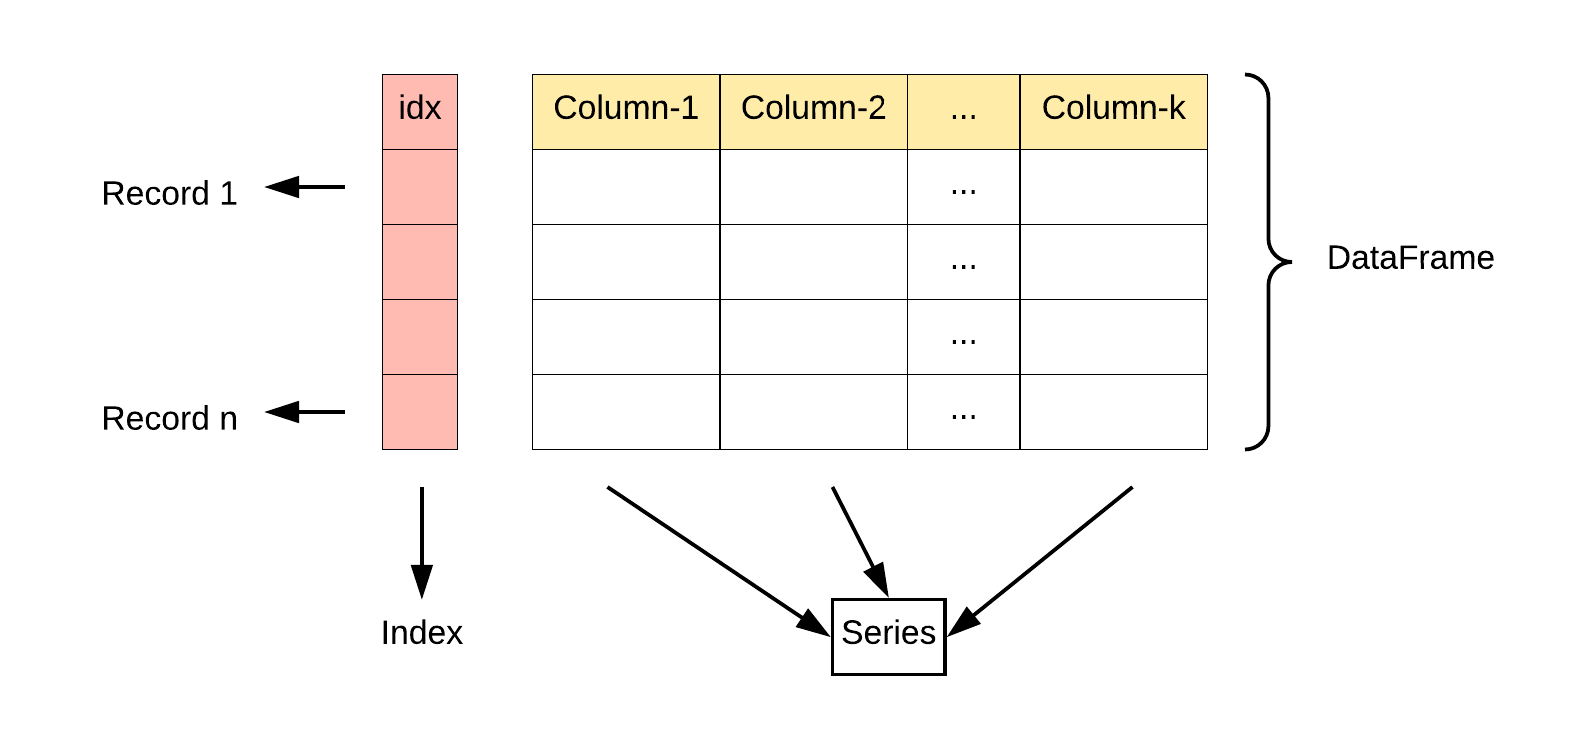

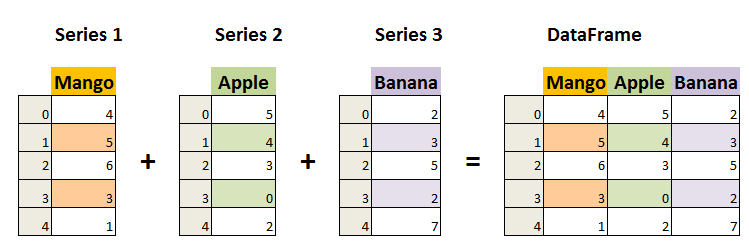

#### 用 list 創建

In [ ]:
import pandas as pd

data = [['Google', 10], ['Runoob', 12], ['Wiki', 13]]

# 創建一個新的DataFrame
df_01 = pd.DataFrame(data, columns=['Site', 'Age'])

# 使用astype的方式設定資料類型
df_01['Site'] = df['Site'].astype(str)
df_01['Age'] = df['Age'].astype(int)

print(df_01)

     Site  Age
0  Google   10
1  Runoob   12
2    Wiki   13


#### 用字典創建

In [ ]:
dic = {'Site':['Google', 'Runoob', 'Wiki'], 'Age':[10, 12, 13]}

df_02 = pd.DataFrame(dic)

print (df_02)

     Site  Age
0  Google   10
1  Runoob   12
2    Wiki   13


#### 用 ndarray 創建 DataFrame

ndarray 是 NumPy 的算是超級重要的資料結構之一，他可以創建 N 維的陣列物件，可以是一維、二維、三維甚至更多維。

> 它有固定維度（dimension）與形狀（shape），將所有元素排成一個固定形狀的矩陣，且所有元素必須是同類型（ Python 的 list 不同），並支持向量運算喔



In [ ]:
import numpy as np

# 一維陣列
a = np.array([1, 2, 3])
print(a.shape)

# 二維陣列（矩陣）
b = np.array([[1, 2], [3, 4]])
print(b.shape)

print(b.dtype)

(3,)
(2, 2)
int64


In [ ]:
import numpy as np
import pandas as pd

# 先創建二維的ndarray
ndarray_data = np.array([
    ['Google', 10],
    ['Yahoo', 12],
    ['Wiki', 13]
])

# 使用DataFrame設定欄位名稱
df = pd.DataFrame(ndarray_data, columns=['Site', 'Age'])

print(df)

     Site Age
0  Google  10
1   Yahoo  12
2    Wiki  13


Pandas 可以使用` loc `屬性傳回指定 row 的數據，如果沒有設定Index，第一個row index為 0，第二個row index為 1，以此類推。

In [ ]:
import pandas as pd

data = {
  "calories": [420, 380, 390],
  "duration": [50, 40, 45]
}

# 把上面的數據丟到DataFrame
df = pd.DataFrame(data)

# 第一行
print(df.loc[0])
# 第二行
print(df.loc[1])



calories    420
duration     50
Name: 0, dtype: int64
calories    380
duration     40
Name: 1, dtype: int64


我們同時可以輸出多個series，也就是一個完整的 DataFrame

In [ ]:
print(df.loc[[0, 1]])

   calories  duration
0       420        50
1       380        40


我們也可以指定index

In [ ]:
df = pd.DataFrame(data, index = ["day1", "day2", "day3"])
print(df)

      calories  duration
day1       420        50
day2       380        40
day3       390        45



## 1.1 載入資料來源：常見資料格式

在初步了解完 Pandas 的功能後，我們要實際對一筆數據操作了。

如果以一個小型專案來說，資料的取得方式有很多種，最常見的包括：讀取 CSV、連接關聯式資料庫（Relational DB）、串接 API、讀取 Excel（Spreadsheet），或者是要處理
處理 JSON 或 YAML 等設定檔格式。

而這些資料通常會以某種格式儲存或傳輸，因此在開始分析前，我們需要先認識比較常見的基本的資料格式處。


### 1.1.1 JSON（JavaScript Object Notation）

JSON 是一種輕量級的數據交換格式，擁有易讀、易寫的特點，相對於其他資料格式`檔案大小更小，傳輸速度更快`，並且容易讓電腦解析和生成。JSON在網頁開發中廣泛應用，API應用與前後端資料交換的時候非常常用。



```json
{
  "user": {
    "id": 1,
    "name": "John Doe",
    "email": "john.doe@example.com",
    "isStudent": true,
    "courses": [
      {
        "id": 101,
        "title": "Introduction to Programming",
        "instructor": "Jane Smith"
      },
      {
        "id": 102,
        "title": "Data Structures and Algorithms",
        "instructor": "Tom Brown"
      }
    ]
  }
}

```

[參考資料](https://tw.alphacamp.co/blog/json)


### 1.1.2 YAML（YAML Ain't Markup Language）
YAML 一種以`縮排`表示層級關係的資料格式，語法簡潔、結構清楚，廣泛用於設定檔撰寫。

YAML 使用縮排表達資料的階層結構，格式簡潔且可讀性高，同時也支援使用 # 來加入註解，有利於人員閱讀與維護。

YAML 常被用於 Docker、Kubernetes 的設定檔撰寫，亦是 CI/CD 自動化流程與機器學習參數設定（如 MLflow）中常見的格式選擇。

這邊有個印象就好～

```yaml
apiVersion: apps/v1 # 版本v1
kind: Deployment
metadata:
  name: k0s-nginx
spec:
  selector:
    matchLabels:
      app: nginx
  replicas: 1
  template:
    metadata:
      labels:
        app: nginx
    spec:
      containers:
      - name: nginx
        image: nginx:latest
        ports:
        - containerPort: 80
```

[參考資料](https://ithelp.ithome.com.tw/articles/10263367)



### 1.1.3 XML（eXtensible Markup Language）

XML 是一種使用`標籤`表示資料階層結構的標記語言，語法嚴謹，適合用來交換與儲存結構化資料。

XML 的結構類似 HTML，都屬於`標記語言(Markup language)`的大家庭，使用開關標籤包裹內容，支援自訂標籤名稱、屬性與命名空間，雖然格式較為冗長，但能嚴謹表達資料架構，常見於舊式 Web 服務如 SOAP，亦用於 RSS 資料流與 Office 文件的內部格式（如 .docx、.xlsx）。

```xml
<?xml version="1.0" encoding="UTF-8"?>
<library>
  <book isbn="978-0321765723">
    <title>
      <![CDATA[<語法學的藝術>]]>
    </title>
    <author>
      <![CDATA[
        John Smith
      ]]>
    </author>
    <year>2022</year>
    <price currency="USD">35.99</price>
  </book>
  <book isbn="978-1234567890">
    <title>
      <![CDATA[
        程式設計入門
      ]]>
    </title>
    <author>
      <![CDATA[
        Jane Doe
      ]]>
    </author>
    <year>2023</year>
    <price currency="USD">25.50</price>
  </book>
</library>

```

[參考文件](https://ithelp.ithome.com.tw/articles/10073956)

### 1.3.4 CSV（Comma-Separated Values）

CSV 是一種以`「逗號`分隔數值的檔案格式，並以`純文字形式`儲存資料 ( 數字和文字 )，是最常見的資料儲存與交換形式之一。

CSV 的結構相對簡單、格式輕巧，能被 Excel、Google Sheets 等軟體直接開啟，適合用於處理表格資料，但不支援巢狀或階層式結構，在資料分析、機器學習模型的輸入與輸出、資料庫匯出都非常常見ㄛ

```csv
name,id,color,price
apple,1,red,10
orange,2,orange,15
grap,3,purple,20
watermelon,4,green,30
```

[參考資料](https://steam.oxxostudio.tw/category/python/library/csv.html)

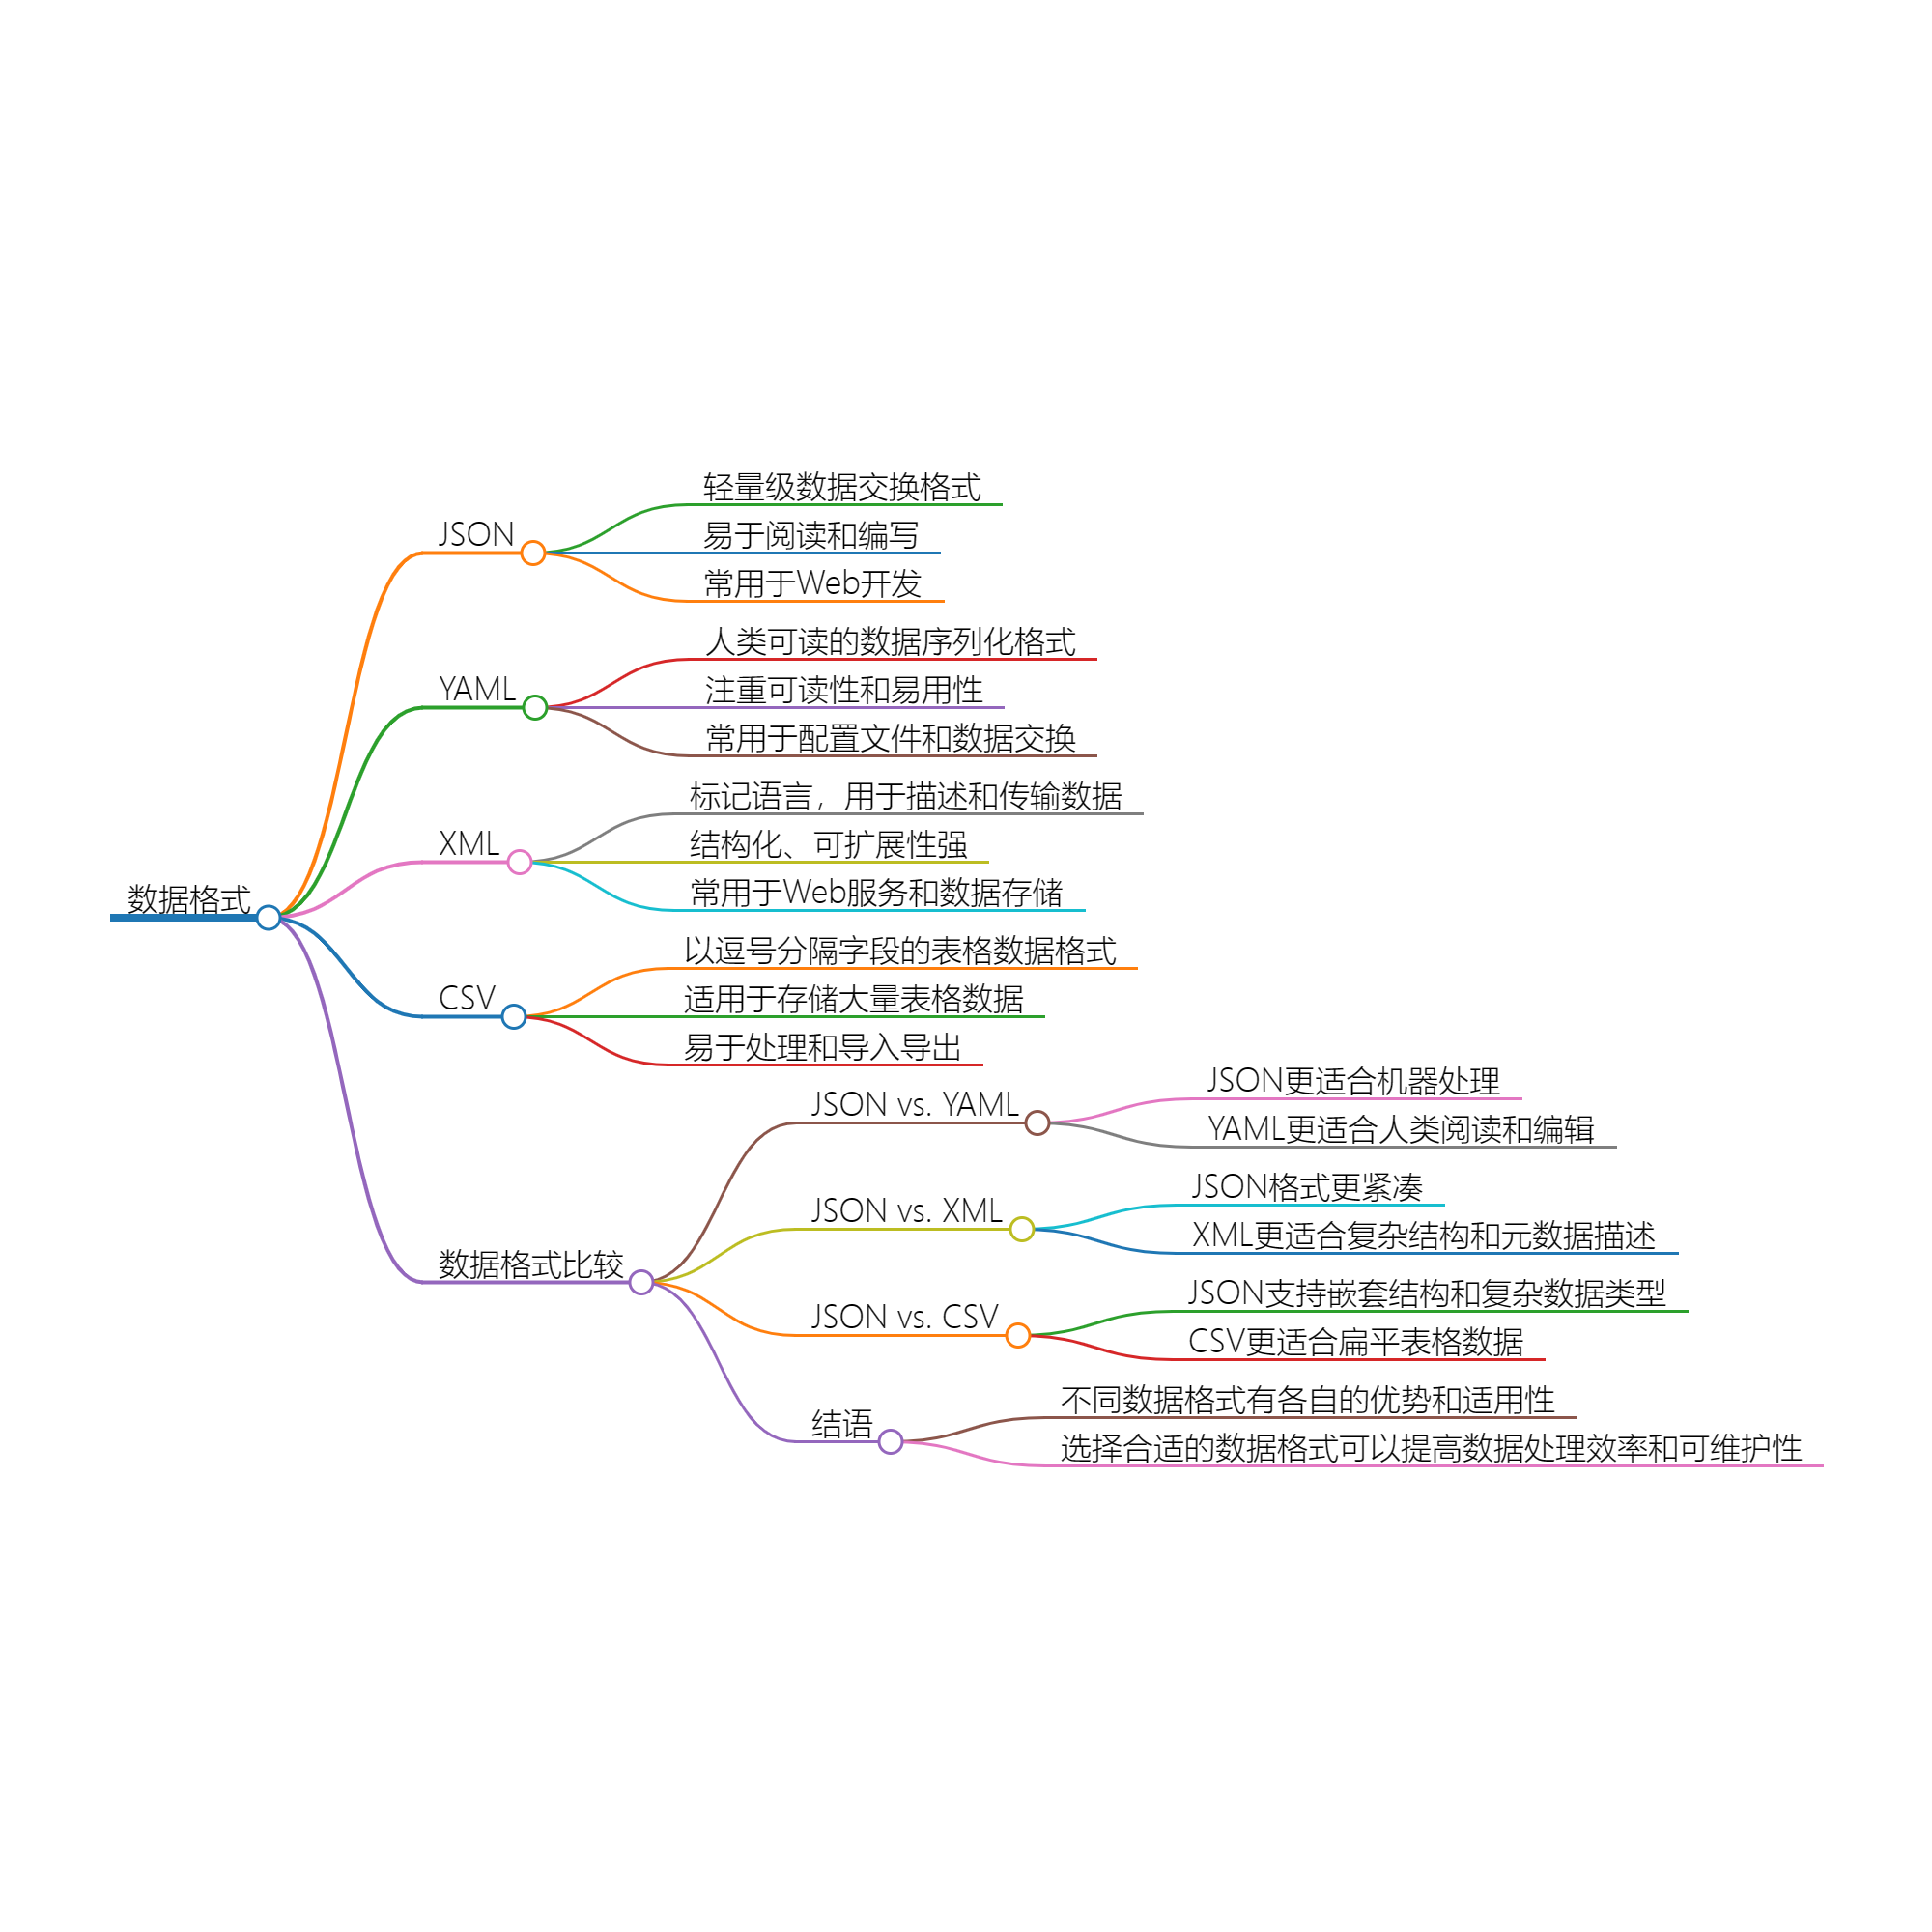




[參考資料](https://www.cnblogs.com/Amd794/p/18102267)

## 1.2 初步檢查資料組成
當你拿到一份資料時，第一步應該是快速掌握這份資料的結構與內容，了解有哪些欄位、資料量多大、欄位型態是否正確、是否存在缺失值或異常格式。這些資訊可以幫助你後續判斷資料是否能直接使用，或需要先進行清理與轉換。

```Python
df.shape              # 查看列數與欄數

df.columns            # 顯示欄位名稱

df.dtypes             # 各欄位的資料型別

df.info()             # 數據整體的資訊（資料型別、缺失值、記憶體）

df.head()             # 預覽前幾筆資料

df.tail()             # 預覽後幾筆資料

df.sample(5)          # 隨機抽樣幾筆資料

df.describe()         # 數值欄的統計摘要

df.isnull().sum()     # 缺失值數量檢查

df.nunique()          # 每個欄位的唯一值數量
```



## 1.3 欄位命名整理

原始資料的欄位名稱常會有大小寫不一、空格、特殊符號、語意不明等問題。統一欄位命名格式能提升資料可讀性、可維護性，也讓後續的程式碼撰寫更一致、更好管理。常見的做法是將欄位轉為小寫 + snake_case 格式。


### 1.3.1  常見欄位命名整理指令
```python
df.columns = df.columns.str.lower() # 轉小寫

df.columns = df.columns.str.upper() # 轉大寫

df.columns = df.columns.str.strip() # 去除前後空白

df.columns = df.columns.str.replace(' ', '_') # 空格改為底線

df.columns = df.columns.str.replace(r'[^a-zA-Z0-9_]', '', regex=True) # 移除特殊字元（只保留英文、數字與底線）

df.rename(columns={
    'Customer Name': 'customer_name',
    'Order Date': 'order_date'
}, inplace=True) # 手動重命名欄位
```

> 其實還有很多，要用的時候再查，多用就記起來了

### 1.3.1 常用欄位命名格式

| 命名風格      | 範例名稱     | 說明與特性                                         | 常見用途/語言                                   |
|---------------|--------------|----------------------------------------------------|------------------------------------------------|
| **snake_case** | `order_date` | 小寫字母 + 底線分隔，清楚易讀                      | Python（Pandas、Flask）、資料欄位標準命名       |
| **camelCase**  | `orderDate`  | 小寫開頭，單字轉折處大寫（駱駝峰命名）             | JavaScript、Java、JSON API                     |
| **PascalCase** | `OrderDate`  | 每個單字首字母大寫                                 | 類別命名（Class Name）、.NET                   |
| **kebab-case** | `order-date` | 使用連字號分隔，不可用於變數（Python 不支援）      | 網址參數、CSS class 名稱                       |
| **UPPER_CASE** | `ORDER_DATE` | 全大寫 + 底線，常用於常數（constant）              | Python 常數、環境變數、設定參數               |

In [ ]:
import pandas as pd

# 建立 DataFrame
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'Age': [25, 30, 35, 40],
    'City': ['New York', 'Los Angeles', 'Chicago', 'Houston']
}
df = pd.DataFrame(data)

# 查看前兩列資料
print(df.head(2))

# 查看 DataFrame 的基本資訊（列數、欄數、型別等）
print(df.info())

# 基本描述統計資訊（只針對數值欄）
print(df.describe())

# 依照年齡排序（由大到小）
df_sorted = df.sort_values(by='age', ascending=False)
print(df_sorted)

# 欄位命名整理：轉為小寫並改為 snake_case
df.columns = df.columns.str.lower().str.replace(' ', '_')

# 輸出為 CSV 檔案（不包含索引欄）
#df.to_csv('output.csv', index=False)

    Name  Age         City
0  Alice   25     New York
1    Bob   30  Los Angeles
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    4 non-null      object
 1   Age     4 non-null      int64 
 2   City    4 non-null      object
dtypes: int64(1), object(2)
memory usage: 228.0+ bytes
None
             Age
count   4.000000
mean   32.500000
std     6.454972
min    25.000000
25%    28.750000
50%    32.500000
75%    36.250000
max    40.000000
      Name  Age         City
3    David   40      Houston
2  Charlie   35      Chicago
1      Bob   30  Los Angeles
0    Alice   25     New York


## 1.4 選取欄列



#### 資料表格的結構

資料表格（Tabular data）是以二維矩形表格形式呈現的資料，結構由列（rows）與欄（columns）所組成

列（Rows）：

* 每一列代表一個物件或事件的紀錄（record）或觀察值（observation）
* 每一列可以包含多個資訊項目
* 每一列的結構相同

欄（Columns）：
* 每一欄代表觀察值的一個屬性（attribute）或特徵（property）
* 每一欄只包含一種類型的資料
* 每一欄都有標題（header）

每個資料表都包含同一類型物件或事件的一組觀察值

DataFrame（資料框）可以被視為「表格資料（tabular data）」在程式中的具體實作形式。要查看 DataFrame 中的所有欄位名稱，可以使用以下方法 :

In [ ]:
dc.columns

Index(['page_id', 'name', 'urlslug', 'ID', 'ALIGN', 'EYE', 'HAIR', 'SEX',
       'GSM', 'ALIVE', 'APPEARANCES', 'FIRST APPEARANCE', 'YEAR'],
      dtype='object')

這會回傳一個 Index 物件，列出所有欄位名稱

我們可以透過提供一個欄位名稱的清單（list），來選取多個欄位：

In [ ]:
dc[['name', 'ID']].head()

,name,ID
0,Batman (Bruce Wayne),Secret Identity
1,Superman (Clark Kent),Secret Identity
2,Green Lantern (Hal Jordan),Secret Identity
3,James Gordon (New Earth),Public Identity
4,Richard Grayson (New Earth),Secret Identity


若欄位名稱不存在，便會顯示error

In [ ]:
dc[[0]]

KeyError: "None of [Index([0], dtype='int64')] are in the [columns]"

這樣取得的結果是一個 `DataFrame`（而非 `Series`）

我們也可以使用類似切片（slicing）的語法，透過列號（row numbers）來選取資料
* 例如：

In [ ]:
dc[0:2] # first 2 rows

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0


# 2. 資料清理與準備

實務上在收集完資料之後，到真正進入模型之前還有一個重要的環節需要處理，稱為是「資料前處理（Data Preprocessing）」。

收集到的資料不一定是最適合模型存取的樣子。在這個環節的主要工作就是將資料調整成適合模型的輸入，也有人把這個過程稱為 ETL （Extract-Transform-Load） 。

### 延伸閱讀：[[Data] Data Pipeline 101（三）—ETL](https://medium.com/bryanyang0528/data-data-pipeline-101-%E4%B8%89-etl-2a010a0e9fb5)

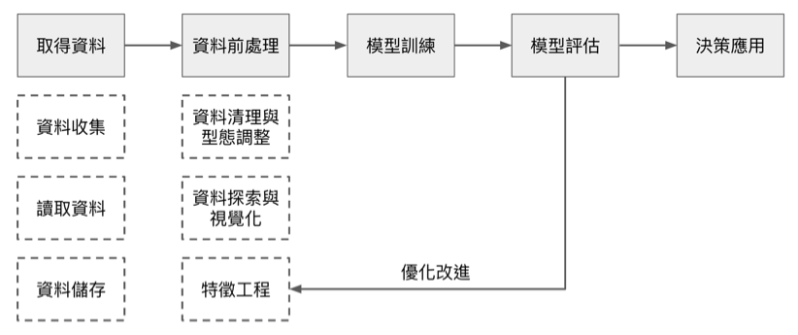

清理資料的目的是將原始資料中的「缺失值」或「錯誤值」轉成適合模型可以存取的資料，如果有未清理的資料會導致模型無法順利運行。

### 什麼是「適合模型的資料」呢？
接著更進一步的定義「適合模型的資料」，我們稱為「模型可以學習（Learniable）」的資料，指的是能夠經由數學模型存取的資料格式，也就是數學上的「向量/矩陣」，在程式當中通常以「Vector/DataFrame」來存放。所以需要被處理的資料指的就是「無法透過數學運算的」。

[參考資料](https://tw.alphacamp.co/blog/data-processing-and-data-cleaning)

## 2.1 處理缺失值

缺失值（Missing data）是指在某個觀察中，某個變數沒有儲存任何資料值的情況。

* 缺失資料是常見的問題，可能來自資料中的不同來源：

  * **問卷調查資料：**

    * 受訪者隨機漏答部分問題
    * 受訪者選擇不回答像「你曾經在考試中作弊嗎？」這類敏感問題
  * **長期研究或實驗：**

    * 參與者在醫學研究中中途退出
    * 在研究進行到一半時才開始收集新的變數
  * **其他情況：**

    * 結果或測量資料遭到損毀
    * 電影評論資料：每位使用者僅針對少數電影明確表達自己的偏好

#### 下載 pandas

In [ ]:
!pip install pandas

#### 載入資料

我們使用 `pd.read_csv()` 來載入資料：
首先，我們需要在左邊的最後一個檔案的位置上傳這次要使用的 [csv 檔](https://drive.google.com/file/d/1LtjpiVlfxR3ZAbYFG5nJ4dyZt6QtqMDc/view?usp=sharing) "dc-wikia-data.csv"

點擊後，左上角的有「上傳至工作階段儲存空間」，把我們今天要使用的檔案上傳上去

請先點擊上方的


In [ ]:
import pandas as pd
dc = pd.read_csv('dc-wikia-data.csv')

#### 快速查看資料

我們可以注意到資料中可能存在一些潛在問題：

In [ ]:
display(dc.head(1))
display(dc.tail(1))

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0


,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
6895,150660,Mookie (New Earth),\/wiki\/Mookie_(New_Earth),Public Identity,Bad Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,NaN,NaN,NaN


* 缺失資料：`NaN` 表示對應的資料在資料集中不存在
* 可能需要進行一些前處理：

  * `YEAR` 目前是浮點數格式
  * 根據分析目的，我們可能希望將「name」欄位中 actual name 與 universe 的資訊分開

#### 在 Pandas 中表示缺失資料

`NaN` 用來表示缺失資料。例如：

In [ ]:
dc.YEAR.tail(10)

,YEAR
6886,1936.0
6887,NaN
6888,NaN
6889,NaN
6890,NaN
6891,NaN
6892,NaN
6893,NaN
6894,NaN
6895,NaN


#### 缺失資料的數量

檢查缺失資料的數量：如果缺失值太多，資料集可能就沒有分析價值。

* 我們可以使用下列方式，在 `Pandas` 中檢查每個欄位的缺失資料數量：


In [ ]:
dc.isnull().sum()

,0
page_id,0
name,0
urlslug,0
ID,2013
ALIGN,601
EYE,3628
HAIR,2274
SEX,125
GSM,6832
ALIVE,3


* 我們所需的變數（"NAME"、"ALIGN"、"SEX"、"APPEARANCES" 和 "YEAR"）只有相對較少的缺失資料

  * 之後我們會介紹如何處理這些缺失資料

* 若分析需要使用像 "EYE" 這類缺失比例較高的變數，就必須格外謹慎

#### Pandas 中的缺失資料

Pandas 在計算統計量時，通常會自動忽略缺失資料

* 例如，上面我們看到 YEAR 有缺失資料，但仍然可以順利計算以下統計量：

In [ ]:
dc.YEAR.mean()

np.float64(1989.7666617840925)

In [ ]:
dc.YEAR.mode()

,YEAR
0,2006.0


#### 為什麼要處理缺失資料？

* 有時候，一筆觀察中的缺失資料可能代表該筆資料本身有問題，因此在分析時最好不要使用

* 有時候則必須處理缺失資料。例如，多數模型要求輸入的資料不能有缺失值

  * 示範：當資料中沒有缺失值時，我們可以擬合一個線性迴歸模型：

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]], dtype = float) # 4 x 2
y = np.dot(X, np.array([1, 2])) + 3 #  y = 1*x1 + 2*x2 + 3
reg = LinearRegression().fit(X, y)

但是當有缺失資料的時候就會出現error

In [ ]:
X[0,0] = np.nan # # 將 X 的第 1 列第 1 欄（索引從 0 開始）改成缺失值 NaN
reg = LinearRegression().fit(X, y)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

### 2.1.1 濾出缺失資料

#### 在 Pandas 中尋找缺失資料

* 可以使用 `isnull()` 和 `notnull()` 來檢查資料中是否存在缺失值。例如：

In [ ]:
dc.YEAR.isnull().tail(10)

,YEAR
6886,False
6887,True
6888,True
6889,True
6890,True
6891,True
6892,True
6893,True
6894,True
6895,True


`isnull()` 會在對應的資料為缺失值時回傳 `True`

### 2.1.2 填寫缺失資料

#### 處理遺漏資料的方法

* 刪除任何包含遺漏值的觀測資料
* 以替代值填補遺漏資料

若想進一步了解如何在 Pandas 中處理遺漏資料，請參考[這裡的說明](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html#filling-missing-values-fillna)

#### 1. 在 Pandas 中刪除遺漏的觀測值

我們可以使用 `dropna()` 方法來刪除含有 `NaN` 的資料

預設情況下，`dropna()` 只會保留所有欄位皆有值的列

* 例如：



In [ ]:
dc_no_na = dc.dropna().copy() # here we explicitly create a copy
display(dc_no_na.head(3))
display(dc_no_na.tail(3))

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
48,1704,John Constantine (New Earth),\/wiki\/John_Constantine_(New_Earth),Public Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,Bisexual Characters,Living Characters,371.0,"1984, June",1984.0
65,8856,Renee Montoya (New Earth),\/wiki\/Renee_Montoya_(New_Earth),Secret Identity,Good Characters,Brown Eyes,Black Hair,Female Characters,Homosexual Characters,Living Characters,308.0,"1992, March",1992.0
119,1862,Todd Rice (New Earth),\/wiki\/Todd_Rice_(New_Earth),Public Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,Homosexual Characters,Living Characters,208.0,"1983, September",1983.0


,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
5303,112309,Joshua Barbazon (New Earth),\/wiki\/Joshua_Barbazon_(New_Earth),Public Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,Homosexual Characters,Living Characters,2.0,1989,1989.0
5794,156750,Big Thunder (New Earth),\/wiki\/Big_Thunder_(New_Earth),Secret Identity,Good Characters,Black Eyes,Black Hair,Male Characters,Homosexual Characters,Living Characters,1.0,"2006, April",2006.0
6052,194137,Twilight II (New Earth),\/wiki\/Twilight_II_(New_Earth),Secret Identity,Bad Characters,Blue Eyes,White Hair,Female Characters,Homosexual Characters,Living Characters,1.0,"1997, November",1997.0


In [ ]:
dc_no_na.shape

(38, 13)

#### 更多關於 `dropna()` 的說明

在預設情況下，只有所有欄位皆有值的列會被保留下來

如果某些欄位中有大量遺漏值，則可能會導致許多列被刪除

* 例如：

In [ ]:
dc_to_drop_all_na = pd.read_csv('dc-wikia-data.csv')
# number of observations that there are at least one NaN
dc_to_drop_all_na.isnull().any(axis = 1).sum()

np.int64(6858)

許多列被刪除了：

In [ ]:
dc_to_drop_all_na.dropna(inplace=True)
dc_to_drop_all_na.shape

(38, 13)

或者，你可以使用額外的參數 how='all'，只刪除所有欄位皆為遺漏值的列

In [ ]:
students = pd.DataFrame({'names': ['Harry', 'Ron', np.nan, 'Hermione'],
                         'python_level': ['High', 'Low', np.nan, np.nan]})
students

,names,python_level
0,Harry,High
1,Ron,Low
2,NaN,NaN
3,Hermione,NaN


In [ ]:
students.dropna(how='all')

,names,python_level
0,Harry,High
1,Ron,Low
3,Hermione,NaN


#### 刪除觀測值的影響

* 可能導致大量資料遺失

* 可能造成偏誤

  * 例如，我們有學生的成績資料，並詢問他們花了多少時間複習課程內容。假設：

    * 花較少時間複習的學生更可能不回答這個問題
    * 複習時間與成績呈正相關

若刪除了那些「複習時間」缺失的觀測值，資料中的平均成績就會與實際情況不同

#### 我應該刪除有缺失資料的列嗎？

答案是：要視情況而定
* 有時候，一列中的缺失資料可能代表該觀測有問題，因此不應納入分析

  * 例如：網頁爬蟲抓錯頁面

* 有時候，我們知道如何合理地填補缺失資料，此時填補比刪除更好

  * 例如：2020 年英國新冠疫苗接種數據缺失時，可以用 0 補上

* 有時候，模型不允許缺失資料，此時刪除缺失資料是讓模型可以運行的最簡單方式

#### 2. 插補（Imputation）

<center>
<img src="https://media.geeksforgeeks.org/wp-content/uploads/20250527130809816356/Data-Imputation.webp" width="600">
</center>

插補是以替代值取代遺漏資料的過程

* 若為數值型(quantitative)資料，可用平均數或中位數填補遺漏值；若為名義型(nominal)資料，則可用最常見的類別填補

* 對於時間序列或有順序的資料，可利用前後資料點的值來填補缺失資料

#### 使用 fillna() 進行插補

在 pandas 中，可以使用 fillna() 方法，並提供要填補的數值或方法來補齊遺漏資料。

* 例如，對下列資料：

In [ ]:
dc_fill_na = pd.read_csv('dc-wikia-data.csv',
                         usecols=['name', 'SEX', 'APPEARANCES', 'YEAR', 'ALIGN'])
dc_fill_na.isnull().sum()

,0
name,0
ALIGN,601
SEX,125
APPEARANCES,355
YEAR,69


#### 使用 fillna() 進行插補（續）

我們可以在 DC 資料集中，使用平均數、 中位數或眾數來取代遺漏值，如下所示：

In [ ]:
# Illustrative only. Some of the imputation may not make sense.
dc_fill_na['APPEARANCES'] = dc_fill_na['APPEARANCES'].fillna(1)
dc_fill_na['YEAR'] = dc_fill_na['YEAR'].fillna(round(dc_fill_na['YEAR'].mean()))
dc_fill_na['SEX'] = dc_fill_na['SEX'].fillna(dc_fill_na['SEX'].mode()[0])
dc_fill_na['ALIGN'] = dc_fill_na['ALIGN'].fillna(dc_fill_na['ALIGN'].mode()[0])
dc_fill_na.isnull().sum()

,0
name,0
ALIGN,0
SEX,0
APPEARANCES,0
YEAR,0


詳情看[這裡](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html)

#### 使用平均數／中位數／眾數進行插補（續）

經過上一步的操作後，資料中已無遺漏值（因為「count」的數量與觀測值總數相同）：

In [ ]:
dc_fill_na.describe(include = 'all')

,name,ALIGN,SEX,APPEARANCES,YEAR
count,6896,6896,6896,6896.000000,6896.000000
unique,6896,4,4,NaN,NaN
top,Dmane (Earth-Two),Bad Characters,Male Characters,NaN,NaN
freq,1,3496,4908,NaN,NaN
mean,NaN,NaN,NaN,22.460412,1989.768997
std,NaN,NaN,NaN,85.246129,16.739817
min,NaN,NaN,NaN,1.000000,1935.000000
25%,NaN,NaN,NaN,2.000000,1983.000000
50%,NaN,NaN,NaN,5.000000,1992.000000
75%,NaN,NaN,NaN,14.000000,2003.000000


#### 以平均數／眾數／中位數進行插補的影響

* 可能造成偏誤
  * 例如：

In [ ]:
# original data
(dc['SEX'].value_counts(normalize=True))*100

,proportion
SEX,
Male Characters,70.639492
Female Characters,29.050362
Genderless Characters,0.295377
Transgender Characters,0.014769


In [ ]:
# with missing data filled by the mode, which is "Male Characters"
(dc_fill_na['SEX'].value_counts(normalize=True))*100

,proportion
SEX,
Male Characters,71.171694
Female Characters,28.523782
Genderless Characters,0.290023
Transgender Characters,0.014501


在本次分析中，以眾數（mode）填補可能並不合適

#### 更多處理遺漏資料的方法

除了前述方法外，還有其他方式可以處理遺漏資料，例如：
* 隨機填補遺漏值
* 以模型進行插補（例如迴歸或機器學習模型）
* 新增「遺漏指標變數」（missingness indicator variable）以標示哪些資料原本缺失

因為時間考量所以這次不會介紹到



## 2.2 異常值處理（Outliers Detection）
異常值指的是與其他數據相比 **明顯偏離** 的數據點，有可能是數據輸入錯誤、測量時發生問題，或是數據本身的特殊性。

處理異常值時，我們可以想想看:
1. **是否真的需要移除異常值？**（例如，金融詐欺檢測中的異常交易本身就是關鍵數據）
2. **異常值的來源是什麼？**（例如，技術錯誤導致的極端值 vs. 真正異常的商業行為）
3. **選擇適當的處理方法**，避免影響模型表現。

這邊舉兩個比較常見的處理方法: **IQR（四分位距）** 和 **Z-score 標準分數**。
### 2.2.1 IQR（四分位距, Interquartile Range）
數據偏態明顯，且存在長尾分佈的情況的時候可以使用

<center>
    <img src = "https://online-learning-college.com/wp-content/uploads/2022/04/Interquartile-range-scaled.jpg" width="600">

</center>

<center>
    <img src = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQaivVzj_qcCbAH370s4CRiWJZpng4_Vj0DJQ&s" width="600">

</center>

[參考來源](https://zh.wikipedia.org/zh-tw/%E9%95%BF%E5%B0%BE)

- 怎麼處理異常值?：
  - 取 Q1（25% 分位數）和 Q3（75% 分位數）
  - 計算四分位距（IQR）= Q3 - Q1
  - 設定異常值範圍：
    - **小於 Q1 - 1.5 * IQR**
    - **大於 Q3 + 1.5 * IQR**
  - 超出範圍的數據被視為異常值。

```python
Q1 = df['Reviews'].quantile(0.25)
Q3 = df['Reviews'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Reviews'] >= lower_bound) & (df['Reviews'] <= upper_bound)]
```

適用於非常態分佈，避免受極端值影響，但可能會錯誤刪除極端但有效的數據（如熱門應用程式評論數極高）。

### 2.2.2 Z-score 標準分數
當數據服從**常態分佈**，例如身高、體重、測驗分數的時候，可以去用Z判斷。
- 怎麼處理異常值?：
  - 計算數據的 **Z-score**：
    - \( Z = \frac{x - \mu}{\sigma} \)
  - 超過 3 個標準差（即 `Z > 3` 或 `Z < -3`）的數據視為異常值。


<center>
    <img src = "https://pro.arcgis.com/en/pro-app/latest/tool-reference/spatial-statistics/GUID-CBF63B74-D1B2-44FC-A316-7AC2B1C1D464-web.png" width="600">
</center>


```python
from scipy.stats import zscore

df = df[np.abs(zscore(df['Rating'])) < 3]
```
適用於常態分佈的數據，能有效識別極端值，不適用於偏態分佈的數據，可能會誤刪重要資訊。


### 2.2.3 Winsorization（截尾處理)
當不想刪除異常值，但仍需減少極端值影的時候

- 怎麼處理異常值? 將異常值替換為邊界值，而不是直接刪除：
  - 如果數據超過 `Q3 + 1.5 * IQR`，則設為 `Q3 + 1.5 * IQR`
  - 如果數據低於 `Q1 - 1.5 * IQR`，則設為 `Q1 - 1.5 * IQR`

```python
from scipy.stats.mstats import winsorize

df['Reviews'] = winsorize(df['Reviews'], limits=[0.05, 0.05])  # 限制上下 5% 的異常值
```
你這樣就可以保留所有數據，適合需要完整數據的應用場景，但可能會降低模型對極端值的敏感度，影響某些應用（如詐欺檢測）。

### 延伸閱讀：[連結文字](https://www.atyun.com/58639.html)


## 2.3 型態轉換


#### 檢查欄位型態

In [ ]:
dc.dtypes

,0
page_id,int64
name,object
urlslug,object
ID,object
ALIGN,object
EYE,object
HAIR,object
SEX,object
GSM,object
ALIVE,object


可以看到有些欄位是文字（object），有些是數值（int / float）

將「登場年份（YEAR）」欄位轉換為整數：

In [ ]:
dc["YEAR"] = dc["YEAR"].astype("Int64")  # 注意大小寫：Int64 支援 NaN
print(dc["YEAR"].dtype)


Int64


#### 使用 pd.to_datetime() 轉換日期

若資料集中有日期字串，我們可以將它轉為日期型態：

In [ ]:
dc["FIRST APPEARANCE"] = pd.to_datetime(dc["FIRST APPEARANCE"], errors="coerce")
dc["FIRST APPEARANCE"].head()

/tmp/ipython-input-3788946814.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dc["FIRST APPEARANCE"] = pd.to_datetime(dc["FIRST APPEARANCE"], errors="coerce")


,FIRST APPEARANCE
0,1939-05-01
1,1986-10-01
2,1959-10-01
3,1987-02-01
4,1940-04-01


errors="coerce" 代表若格式錯誤，會自動轉成 NaT（相當於日期版的 NaN）

重新查看傳換後的欄位型態

In [ ]:
dc.dtypes

,0
page_id,int64
name,object
urlslug,object
ID,object
ALIGN,object
EYE,object
HAIR,object
SEX,object
GSM,object
ALIVE,object


`YEAR`和`FIRST APPEARNCE`都成功被轉換成`int64`和`datetime64`的型態了

#### 文字編碼（Character Encoding）

電腦儲存的其實是 數字（0與1），要能顯示文字，就需要一套對應表（編碼系統）把文字 ↔ 數字對起來

不同語言、系統採用的編碼可能不同，這就是造成「亂碼」的原因。在讀取 CSV 檔案時，如果出現亂碼，通常是因為編碼方式（encoding）不一致

最常見的編碼有：
| 編碼          | 全名                                                 | 說明                                                     | 適用範圍           |
| ----------- | -------------------------------------------------- | ------------------------------------------------------ | -------------- |
| **ASCII**   | American Standard Code for Information Interchange | 最早期的英文字母編碼，只支援 A–Z、a–z、0–9、基本符號，共 128 個字元              | 英文環境           |
| **Unicode** | Universal Character Set                            | 為所有語言設計的全球統一編碼標準，每個字都有唯一碼點（code point）                 | 支援全世界文字        |
| **UTF-8**   | Unicode Transformation Format-8 bit                | 一種 **Unicode 的實作方式**，以 1–4 個位元組儲存文字，是目前網頁與 Python 預設編碼 | 英文及國際資料集常用     |
| **Big5**    | Big-5 Chinese Character Encoding                   | 台灣早期 Windows 常用的繁體中文編碼，不含部分罕用字                         | 繁體中文（舊系統）      |
| **CP950**   | Code Page 950                                      | 微軟在 Big5 基礎上擴充的版本，支援更多字元                               | Windows 繁體中文系統 |


In [ ]:
# 若原始檔案是 UTF-8 編碼
df_utf8 = pd.read_csv("dc-wikia-data.csv", encoding="utf-8")

# 若出現亂碼，可改用 Big5 嘗試
# df_big5 = pd.read_csv("dc-wikia-data.csv", encoding="big5")

df_utf8.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0
2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1565.0,"1959, October",1959.0
3,1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,NaN,Living Characters,1316.0,"1987, February",1987.0
4,1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1237.0,"1940, April",1940.0


* `encoding` 參數可確保讀取文字時正確解碼
* 若顯示亂碼，試著用另一種常見編碼重新讀取
* 不同系統（Windows vs macOS/Linux）常使用不同預設編碼

## 2.4 字串處理(String Processing)

### 2.4.1 Python內建的字串物件方法

<center>
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSRSmVIwoX3JSZp7KlbXZx87-2YMBuloHrcOg&s" width="600">
</center>


Python 的字串（str）是不可變（immutable）的序列型別，因此所有操作都會回傳新的字串值

#### 常見方法:

| 方法                           | 功能說明    | 範例                                                |
| ---------------------------- | ------- | ------------------------------------------------- |
| `str.lower()`                | 轉小寫     | `'Hello'.lower()` → `'hello'`                     |
| `str.upper()`                | 轉大寫     | `'hello'.upper()` → `'HELLO'`                     |
| `str.strip()`                | 去除前後空白  | `'  test  '.strip()` → `'test'`                   |
| `str.split()`                | 分割字串    | `'a,b,c'.split(',')` → `['a','b','c']`            |
| `str.join()`                 | 合併串列成字串 | `','.join(['a','b'])` → `'a,b'`                   |
| `str.replace()`              | 取代字串    | `'2025-11-03'.replace('-', '/')` → `'2025/11/03'` |
| `str.find()` / `str.index()` | 查找子字串位置 | `'apple'.find('p')` → `1`                         |


#### 例子

In [ ]:
text = "   Python String Methods Example   "

# 去除空白
cleaned = text.strip()

# 轉換大小寫
print(cleaned.lower())
print(cleaned.upper())

# 分割與合併
words = cleaned.split()
joined = "-".join(words)

print(words)
print(joined)

# 替換字串
print(cleaned.replace("Python", "Pandas"))

python string methods example
PYTHON STRING METHODS EXAMPLE
['Python', 'String', 'Methods', 'Example']
Python-String-Methods-Example
Pandas String Methods Example


#### 練習題：

* 將 "Data Science is FUN!" 轉成全小寫並移除驚嘆號

In [ ]:
# code here

* 將 '2025-11-03' 改成 '2025/11/03'

In [ ]:
# code here

### 2.4.2 正規表達式(Regular expression, regex)

Python有提供 re 模組，能幫助進行更靈活的字串匹配與清理

#### 常見語法:

| 語法        | 意義          | 範例                           |
| --------- | ----------- | ---------------------------- |
| `.`       | 任意單一字元      | `'c.t'` 可匹配 `'cat'`, `'cot'` |
| `\d`      | 數字          | `'a\d'` 匹配 `'a1'`            |
| `\w`      | 英文字母或數字     | `'a\w'` 匹配 `'a_'`, `'ab'`    |
| `^` / `$` | 開頭 / 結尾     | `^Hello`、`end$`              |
| `+` / `*` | 一個以上 / 任意個數 | `'go+'` 匹配 `'go'`, `'goo'`   |
| `{n,m}`   | 次數範圍        | `\d{2,4}` 匹配2到4位數字           |
| `()`      | 群組          | `(\d{4})-(\d{2})-(\d{2})`    |


In [ ]:
import re

text = "My email is test123@gmail.com and phone is 0912-345-678."

# 抓 email
email = re.findall(r'\b[\w.-]+@[\w.-]+\.\w+\b', text)
print("Email:", email)

# 抓電話號碼
phone = re.findall(r'\d{4}-\d{3}-\d{3}', text)
print("Phone:", phone)

# 取代數字
masked = re.sub(r'\d', '*', text)
print("Masked:", masked)

Email: ['test123@gmail.com']
Phone: ['0912-345-678']
Masked: My email is test***@gmail.com and phone is ****-***-***.


#### 練習題

* 從字串 "Contact: user_01@yahoo.com, user_02@outlook.com" 抓出所有 email

In [ ]:
# code here

* 將 "Credit card: 1234-5678-9876-5432" 變成 "Credit card: ****-****-****-****"

In [ ]:
# code here

### 2.4.3 Pandas的字串函式

Pandas 提供了 .str 屬性，可以在整個 Series 上進行字串操作，不需要手寫迴圈

#### 常見函式:

| 函式                      | 功能             | 範例 |
| ----------------------- | -------------- | -- |
| `Series.str.lower()`    | 小寫化            |    |
| `Series.str.contains()` | 是否包含特定字串       |    |
| `Series.str.replace()`  | 替換字串           |    |
| `Series.str.extract()`  | 抽取符合 regex 的部分 |    |
| `Series.str.len()`      | 字串長度           |    |

In [ ]:
import pandas as pd

data = pd.Series([" Alice ", "Bob", "Charlie  ", "david"])

# 去空白 + 小寫化
cleaned = data.str.strip().str.lower()
print(cleaned)

# 找出名字中包含 a 的人
has_a = cleaned[cleaned.str.contains("a")]
print(has_a)

# 用正規表達式抽取名字開頭大寫字母
names = pd.Series(["Tom Hanks", "Emma Watson", "will smith"])
first_name = names.str.extract(r'^(\w+)')
print(first_name)

0      alice
1        bob
2    charlie
3      david
dtype: object
0      alice
2    charlie
3      david
dtype: object
      0
0   Tom
1  Emma
2  will


#### 練習題

* 從 ["LSE Data", "UCL Research", "Cambridge AI"] 中提取出學校名稱（第一個字）

In [ ]:
# code here

## 2.5 類別型資料(Categorical data)

### 類別變數 vs 連續型變數

在資料分析中，變數大致可分為 定量（quantitative） 與類別（categorical）兩大類。以下是它們的主要差異與用途 :



#### 定量變數（Quantitative Variables）

定量變數代表可度量、可進行數學運算的數值

這些數據可以進行加減乘除，並可用於統計分析與建模

常見例子：
* 年齡（25 歲、42 歲）
* 收入（NT$50,000）
* 體重（65.3 公斤）
* 成績（92 分）

特點：
* 數值有意義，可比較「差距」或「比例」
* 可用於計算平均值、標準差、相關係數等
* 可視覺化為折線圖、直方圖、散佈圖

再細分為兩類：
| 類型                  | 說明             | 範例        |
| ------------------- | -------------- | --------- |
| **離散型（Discrete）**   | 只能取整數值（可數的數量）  | 子女人數、顧客人數 |
| **連續型（Continuous）** | 可取任意實數值（可度量的量） | 身高、收入、溫度  |


#### 類別變數（Categorical Variables）

類別變數代表不同的群組或分類，而非可運算的數值

這些值是標籤（labels），而非數量

常見例子：
* 性別（男 / 女）
* 教育程度（高中 / 大學 / 研究所）
* 客戶類型（新客 / 常客 / VIP）

特點：
* 類別之間沒有數值意義
* 無法直接進行加減乘除
* 適合用於分組、分類模型
* 常見視覺化方式：長條圖（bar chart）、圓餅圖（pie chart）

再細分為兩類：
| 類型               | 說明        | 範例                |
| ---------------- | --------- | ----------------- |
| **名義型（Nominal）** | 無順序關係     | 性別、國家、血型          |
| **有序型（Ordinal）** | 有順序但無明確間距 | 教育程度、顧客滿意度（高/中/低） |


### 2.5.1 pandas的categorical擴展型態

#### 範例：建立分類資料

In [ ]:
import pandas as pd
import numpy as np

# 模擬學員資料
df = pd.DataFrame({
    "name": [f"S{i:02d}" for i in range(1, 11)],
    "region": np.random.choice(["北部", "中部", "南部"], 10),
    "level": np.random.choice(["新手", "進階", "專家"], 10)
})

print("原始資料型態：")
print(df.dtypes)
print(df)

原始資料型態：
name      object
region    object
level     object
dtype: object
  name region level
0  S01     中部    進階
1  S02     中部    新手
2  S03     中部    進階
3  S04     南部    專家
4  S05     南部    專家
5  S06     南部    進階
6  S07     南部    進階
7  S08     南部    新手
8  S09     北部    進階
9  S10     南部    新手


轉換為 Categorical 型態

In [ ]:
df["region"] = df["region"].astype("category")
df["level"]  = df["level"].astype("category")

print("轉換後型態：")
print(df.dtypes)

轉換後型態：
name        object
region    category
level     category
dtype: object


#### 有序類別 (Ordered categories)
有時候類別之間有自然順序，例如等級「新手 < 進階 < 專家」

In [ ]:
from pandas.api.types import CategoricalDtype

level_type = CategoricalDtype(categories=["新手", "進階", "專家"], ordered=True)
df["level"] = df["level"].astype(level_type)

print("是否有序：", df["level"].cat.ordered)
print("類別順序：", df["level"].cat.categories)

是否有序： True
類別順序： Index(['新手', '進階', '專家'], dtype='object')


### 2.5.2 用categorical來計算

##### 統計與群組運算

In [ ]:
# 每個地區人數
print(df["region"].value_counts())

# 依等級取平均分數
df["score"] = np.random.randint(60, 100, size=len(df))
df.groupby("level")["score"].mean()

region
北部    4
中部    3
南部    3
Name: count, dtype: int64


/tmp/ipython-input-725820375.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("level")["score"].mean()


,score
level,
新手,80.000000
進階,82.500000
專家,77.333333


#### 排序與比較

ordered = True 的類別可以直接比較大小


In [ ]:
# 篩出比「新手」高的等級
df[df["level"] > "新手"]

,name,region,level,score
1,S02,南部,進階,85
3,S04,中部,專家,79
5,S06,北部,專家,79
8,S09,北部,專家,74
9,S10,北部,進階,80


交叉表分析

In [ ]:
pd.crosstab(df["region"], df["level"])


level,新手,進階,專家
region,,,
中部,2,0,1
北部,1,1,2
南部,2,1,0


### 2.5.3 categorical方法

pandas 為分類型資料提供 .cat 屬性，下面是常用操作：

| 方法                                | 功能說明      | 範例                                                    |
| --------------------------------- | --------- | ----------------------------------------------------- |
| `.cat.categories`                 | 查看或設定類別名稱 | `df["region"].cat.categories`                         |
| `.cat.rename_categories()`        | 重新命名類別    | `df["region"].cat.rename_categories(["北", "中", "南"])` |
| `.cat.reorder_categories()`       | 調整類別順序    | `df["level"].cat.reorder_categories([...])`           |
| `.cat.add_categories()`           | 增加新類別     | `df["region"].cat.add_categories("東部")`               |
| `.cat.remove_unused_categories()` | 移除未使用類別   | `df["region"].cat.remove_unused_categories()`         |
| `.cat.codes`                      | 查看底層整數代碼  | `df["level"].cat.codes`                               |


In [ ]:
# 新增一個未出現的類別
df["region"] = df["region"].cat.add_categories("東部")

# 重新命名
df["region"] = df["region"].cat.rename_categories(["北", "中", "南", "東"])

# 確認命名成功
df.head()


,name,region,level
0,S01,北,進階
1,S02,北,新手
2,S03,北,進階
3,S04,南,專家
4,S05,南,專家


### 2.5.4 小結

| 主題                    | 重點                  |
| --------------------- | ------------------- |
| pandas Categorical 型態 | 節省記憶體，提升計算速度        |
| ordered Categorical   | 適合有順序的分類（如等級）       |
| `.cat` 屬性             | 支援多種操作：新增、排序、重命名、清理 |
